In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12, 6)

Download stock price data from NSE [website](https://www.nseindia.com/products/content/equities/equities/eq_security.htm). Here I download stock price data for TCS stock.


In [3]:
df = pd.read_csv("~/Downloads/tcs.csv")
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,07-May-2018,3480.75,3490.00,3490.00,3410.9,3428.0,3420.95,3438.41,1742213,5.990435e+09,95521,1155927,66.35
1,TCS,EQ,08-May-2018,3420.95,3434.70,3486.50,3396.7,3440.2,3441.20,3447.80,1496410,5.159322e+09,75803,710340,47.47
2,TCS,EQ,09-May-2018,3441.20,3440.20,3494.75,3440.2,3488.5,3489.30,3480.95,1307525,4.551423e+09,74986,754487,57.70
3,TCS,EQ,10-May-2018,3489.30,3502.95,3511.15,3440.2,3446.3,3451.25,3478.59,1929339,6.711381e+09,78782,1044165,54.12
4,TCS,EQ,11-May-2018,3451.25,3454.20,3485.00,3442.5,3461.0,3456.95,3461.07,1313938,4.547637e+09,44332,734225,55.88


Check whether you have duplicate data on by date. It looks like 11/2/2019, 18/2/2019, 25/2/2019 etc. have duplicate data. Not sure why there are duplicates by date. It could be ammendment to the data.

In [4]:
df[df["Date"].duplicated(keep = False)]

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
191,TCS,BL,11-Feb-2019,2604.20,2061.40,2061.40,2061.40,2061.40,2061.40,2061.40,376308,7.757213e+08,1,0,0.00
192,TCS,EQ,11-Feb-2019,2061.40,2060.00,2096.00,2048.90,2065.60,2065.90,2077.11,1778730,3.694622e+09,83603,901516,50.68
197,TCS,BL,18-Feb-2019,2061.40,2029.70,2029.70,2029.70,2029.70,2029.70,2029.70,2474600,5.022696e+09,1,0,0.00
198,TCS,EQ,18-Feb-2019,2029.70,2037.60,2041.95,1962.65,1969.60,1970.30,1988.87,2942184,5.851634e+09,100585,1668905,56.72
203,TCS,BL,25-Feb-2019,2029.70,1925.65,1925.65,1925.65,1925.65,1925.65,1925.65,1057509,2.036392e+09,2,0,0.00
204,TCS,EQ,25-Feb-2019,1925.65,1932.50,1990.00,1930.50,1987.00,1985.15,1961.61,2934880,5.757095e+09,140541,1341508,45.71
221,TCS,BL,22-Mar-2019,1925.65,2015.05,2015.05,2015.05,2015.05,2015.05,2015.05,264913,5.338129e+08,1,264913,100.00
222,TCS,EQ,22-Mar-2019,2015.05,2015.00,2016.00,1983.30,2010.00,2005.65,1998.96,3148149,6.293032e+09,155770,1787595,56.78


Drop the duplicate from the dataset.

In [5]:
df = df[~df["Date"].duplicated()]

Convert the dataset into time series data by undating the index to time series index. 

In [6]:
df.index = pd.to_datetime(df["Date"])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2018-05-07,TCS,EQ,07-May-2018,3480.75,3490.00,3490.00,3410.9,3428.0,3420.95,3438.41,1742213,5.990435e+09,95521,1155927,66.35
2018-05-08,TCS,EQ,08-May-2018,3420.95,3434.70,3486.50,3396.7,3440.2,3441.20,3447.80,1496410,5.159322e+09,75803,710340,47.47
2018-05-09,TCS,EQ,09-May-2018,3441.20,3440.20,3494.75,3440.2,3488.5,3489.30,3480.95,1307525,4.551423e+09,74986,754487,57.70
2018-05-10,TCS,EQ,10-May-2018,3489.30,3502.95,3511.15,3440.2,3446.3,3451.25,3478.59,1929339,6.711381e+09,78782,1044165,54.12
2018-05-11,TCS,EQ,11-May-2018,3451.25,3454.20,3485.00,3442.5,3461.0,3456.95,3461.07,1313938,4.547637e+09,44332,734225,55.88


In [7]:
df.index

DatetimeIndex(['2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2019-04-18', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-30', '2019-05-02',
               '2019-05-03', '2019-05-06'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

Look at trend of close price. We see there is a price adjust has been done on 31/05/2018. Let's shift the origin of dataset to 1/Jun to avoid price adjustment.

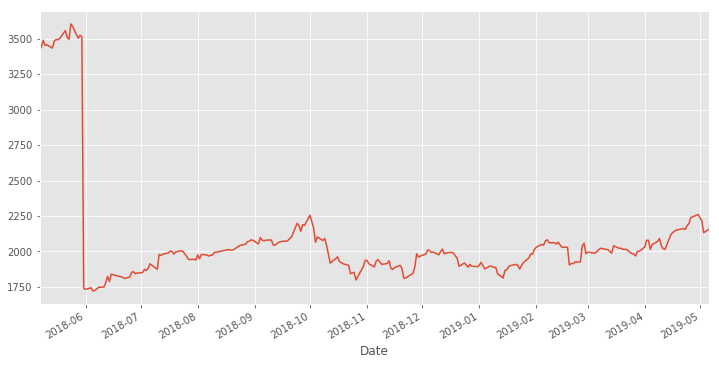

In [8]:
y = df["Close Price"]
y.plot()

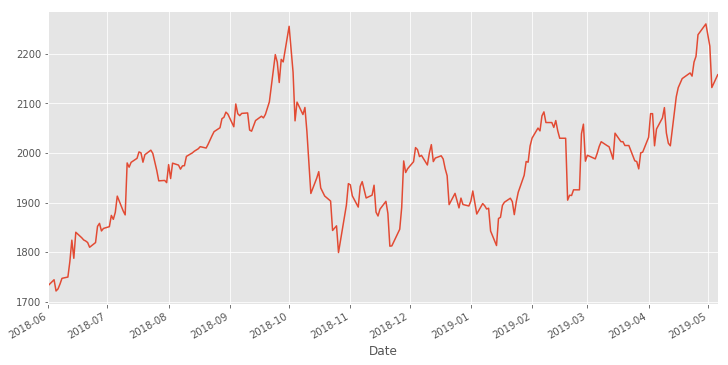

In [9]:
y = y[y.index>"2018-05-31"]
y.plot()

Let's see if there are gaps in the data in terms of date range. Trading does not happen on weekends or national holidays. So there is no data on those days. 

In [10]:
list(y.index[:10])

[Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-06-04 00:00:00'),
 Timestamp('2018-06-05 00:00:00'),
 Timestamp('2018-06-06 00:00:00'),
 Timestamp('2018-06-07 00:00:00'),
 Timestamp('2018-06-08 00:00:00'),
 Timestamp('2018-06-11 00:00:00'),
 Timestamp('2018-06-12 00:00:00'),
 Timestamp('2018-06-13 00:00:00'),
 Timestamp('2018-06-14 00:00:00')]

In [11]:
y.asfreq("D")[:15]

Date
2018-06-01    1732.45
2018-06-02        NaN
2018-06-03        NaN
2018-06-04    1744.25
2018-06-05    1721.60
2018-06-06    1725.75
2018-06-07    1735.55
2018-06-08    1747.10
2018-06-09        NaN
2018-06-10        NaN
2018-06-11    1749.70
2018-06-12    1781.00
2018-06-13    1824.10
2018-06-14    1787.55
2018-06-15    1840.05
Freq: D, Name: Close Price, dtype: float64

Let's impute the missing data by forward fill.

In [12]:
y = y.asfreq("D", method="ffill" )
y[:15]

Date
2018-06-01    1732.45
2018-06-02    1732.45
2018-06-03    1732.45
2018-06-04    1744.25
2018-06-05    1721.60
2018-06-06    1725.75
2018-06-07    1735.55
2018-06-08    1747.10
2018-06-09    1747.10
2018-06-10    1747.10
2018-06-11    1749.70
2018-06-12    1781.00
2018-06-13    1824.10
2018-06-14    1787.55
2018-06-15    1840.05
Freq: D, Name: Close Price, dtype: float64

Calculate quarterly high, low prices.

In [13]:
pd.DataFrame(dict(low=y.resample("Q").min(), 
                  high=y.resample("Q").max(), 
                  first = y.resample("Q").first(), 
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

,low,high,first,last,median,mean
Date,,,,,,
2018-06-30,1721.60,1858.00,1732.45,1847.75,1809.800,1794.015000
2018-09-30,1847.75,2198.45,1847.75,2183.70,2007.075,2018.245109
2018-12-31,1799.10,2255.55,2255.55,1893.05,1918.400,1941.177717
2019-03-31,1813.25,2082.90,1902.80,2001.65,1995.400,1972.373333
2019-06-30,2014.50,2260.35,2031.65,2157.85,2132.000,2125.870833


Calculate rolling mean, exponentially weighted mean

In [14]:
period = 20
y_rolling = pd.DataFrame(dict(actual = y, 
                              rolling_mean = y.rolling(period).mean(), 
                              ewma = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewma
Date,,,
2018-06-01,1732.45,NaN,1732.450000
2018-06-02,1732.45,NaN,1732.450000
2018-06-03,1732.45,NaN,1732.450000
2018-06-04,1744.25,NaN,1735.856478
2018-06-05,1721.60,NaN,1732.407957
2018-06-06,1725.75,NaN,1731.003432
2018-06-07,1735.55,NaN,1731.863076
2018-06-08,1747.10,NaN,1734.496855
2018-06-09,1747.10,NaN,1736.518461


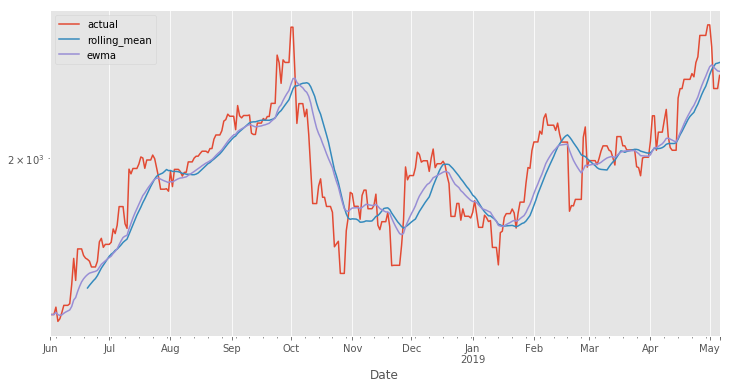

In [15]:
y_rolling.plot(logy = True)

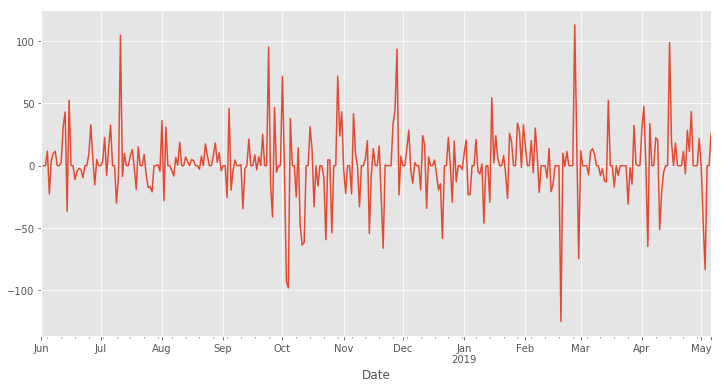

In [16]:
y.diff(periods=1).plot()

Use pandas's auto correlation plot. Here is a nice explanation of the [autocorrelation plot](https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show) 

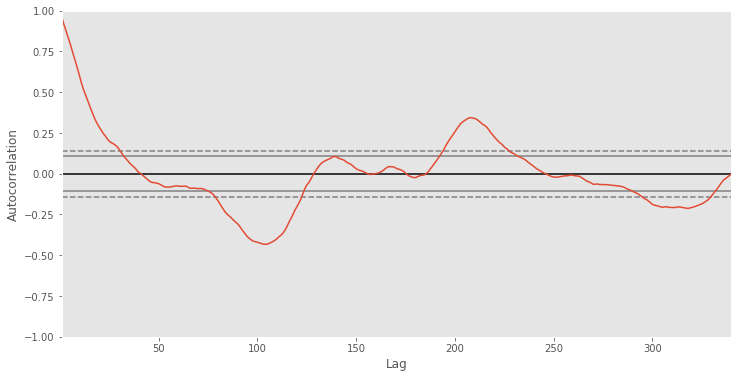

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

                0
count  339.000000
mean    -0.001153
std     25.880482
min   -126.937556
25%     -7.384144
50%     -0.781054
75%      8.008500
max    111.576239


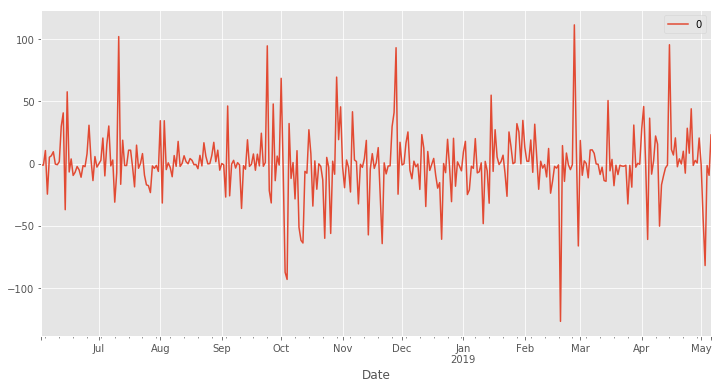

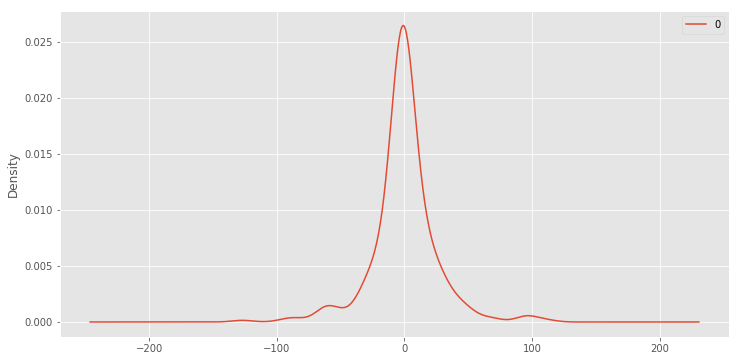

In [18]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(y, order=(5,1,0)) # p, d, q
model_fit = model.fit(disp=0)
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

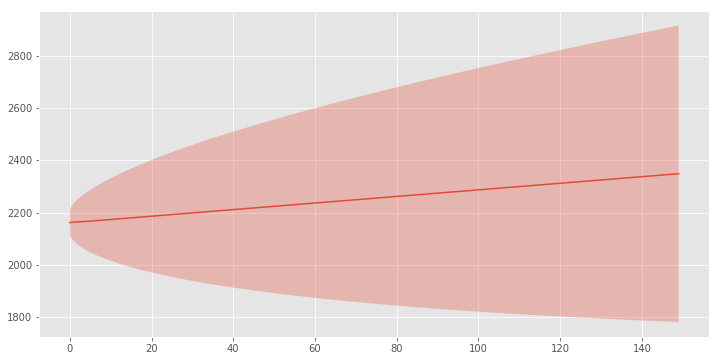

In [30]:
model = ARIMA(y.values, order=(5,1,0))
model_fit = model.fit(disp=0)
predictions, error, conf_interval = model_fit.forecast(150)
plt.plot(predictions)
plt.fill_between(range(len(predictions)), conf_interval[:,0], conf_interval[:,1], alpha = 0.3)

In [31]:
predictions[:10]

array([2161.64861226, 2163.78259624, 2164.37869109, 2165.67418949,
       2166.10949604, 2167.25301975, 2168.55067209, 2169.8667108 ,
       2171.12362193, 2172.40823859])

In [33]:
error[:10]

array([25.84222175, 37.49571671, 44.94301009, 50.94821134, 56.45617965,
       61.1657571 , 65.49530029, 69.60430706, 73.50483421, 77.20100996])

In [34]:
conf_interval[:10]

array([[2110.99878836, 2212.29843617],
       [2090.29234191, 2237.27285056],
       [2076.29200997, 2252.46537222],
       [2065.81753019, 2265.53084878],
       [2055.45741722, 2276.76157485],
       [2047.37033875, 2287.13570074],
       [2040.18224238, 2296.91910181],
       [2033.44477578, 2306.28864581],
       [2027.05679418, 2315.19044968],
       [2021.0970395 , 2323.71943768]])

In [35]:
(predictions + 1.96 * error)[:10]

array([2212.29936689, 2237.27420099, 2252.46699086, 2265.53268371,
       2276.76360815, 2287.13790366, 2296.92146065, 2306.29115265,
       2315.19309699, 2323.72221811])

In [36]:
(predictions - 1.96 * error)[:10]

array([2110.99785764, 2090.29099148, 2076.29039132, 2065.81569527,
       2055.45538393, 2047.36813584, 2040.17988353, 2033.44226895,
       2027.05414687, 2021.09425907])

predicted=1875.339195, expected=1901.550000
predicted=1905.270309, expected=1920.800000
predicted=1921.063724, expected=1920.800000
predicted=1920.146074, expected=1920.800000
predicted=1921.391322, expected=1955.000000
predicted=1956.861788, expected=1982.750000
predicted=1982.424544, expected=1981.400000
predicted=1979.880490, expected=2014.100000
predicted=2016.754283, expected=2029.950000
predicted=2029.290625, expected=2029.950000
predicted=2029.514123, expected=2029.950000
predicted=2031.163827, expected=2050.250000
predicted=2052.173648, expected=2044.550000
predicted=2043.888444, expected=2074.800000
predicted=2078.028823, expected=2082.900000
predicted=2082.916646, expected=2061.400000
predicted=2060.749980, expected=2061.400000
predicted=2064.295334, expected=2061.400000
predicted=2062.327336, expected=2061.400000
predicted=2062.613448, expected=2051.600000
predicted=2052.720069, expected=2065.400000
predicted=2068.092766, expected=2044.600000
predicted=2043.966425, expected=

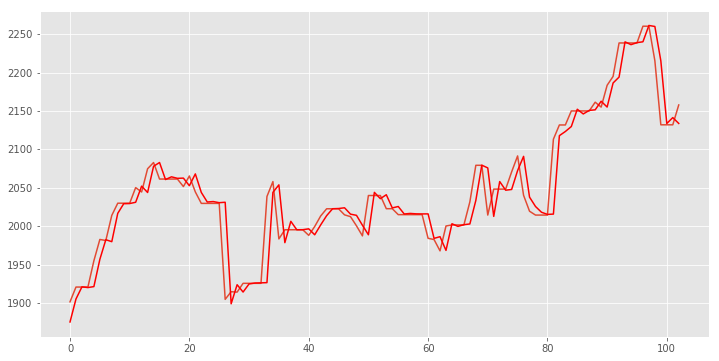

In [21]:
from sklearn.metrics import mean_squared_error

x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

plt.plot(test)
plt.plot(predictions, color='red')


In [22]:
result = pd.DataFrame(y)[train_size:]
result.columns = ["actual"]
result["prediction"] = predictions
result

,actual,prediction
Date,,
2019-01-24,1901.55,1875.339195
2019-01-25,1920.80,1905.270309
2019-01-26,1920.80,1921.063724
2019-01-27,1920.80,1920.146074
2019-01-28,1955.00,1921.391322
2019-01-29,1982.75,1956.861788
2019-01-30,1981.40,1982.424544
2019-01-31,2014.10,1979.880490
2019-02-01,2029.95,2016.754283


In [38]:
pd.date_range(start="2019-05-10", periods=10, freq="S")

DatetimeIndex(['2019-05-10 00:00:00', '2019-05-10 00:00:01',
               '2019-05-10 00:00:02', '2019-05-10 00:00:03',
               '2019-05-10 00:00:04', '2019-05-10 00:00:05',
               '2019-05-10 00:00:06', '2019-05-10 00:00:07',
               '2019-05-10 00:00:08', '2019-05-10 00:00:09'],
              dtype='datetime64[ns]', freq='S')